# Pengolahan data MAWS

# Impor pustaka python yang dibutuhkan <a id="impor-modul"></a>

In [1]:
import numpy as np
import sys
from diklatmar import loader

# Lokasi Data

## Lokasi Data Diklat

In [2]:
dir_data = "/data/local/marine-training/data/MATPEL_03/MAWS_BMKG"

## Lokasi Meta file

### Metadata AWS Existing

In [3]:
fnme_meta1 = "metadata_existing.csv"

#### Buka metadata 1

In [4]:
data = loader(dir_data)
df_meta1 = data.meta(fnme_meta1)

2025-05-05 03:05:49 :	I	Loaded metadata from metadata_existing.csv


In [5]:
# Menampilkan tabel metadata
print(df_meta1)

                                      station   latitude   longitude
id                                                                  
1000000009           AWS_Maritim__Ujung_Kulon  -6.815362  105.482341
3000000001                 AWS_Maritim_Bungus  -1.029570  100.395900
3000000002                AWS_Maritim_Kendari  -3.978255  122.597562
3000000004              AWS_Maritim_Bakauheni  -5.869730  105.755494
3000000006          AWS_Maritim_Tanjung_Perak  -7.196366  112.741795
3000000007    AWS_Maritim_Banyuwangi_Ketapang  -8.142775  114.401037
3000000008                AWS_Maritim_Maumere  -8.621250  122.219722
3000000009          AWS_Maritim_Tanjung_Priok  -6.121360  106.838106
3000000010                 AWS_Maritim_Bitung   1.458697  125.217993
3000000011              AWS_Maritim_Pontianak  -0.020613  109.337349
3000000012          AWS_Maritim_Lembar_Lombok  -8.730206  116.073726
3000000014               AWS_Maritim_Semarang  -6.943510  110.431310
3000000015                AWS_Mari

### Metadata AWS MMS 1

In [6]:
fnme_meta2 = "metadata_mms1.csv"

#### Buka metadata 2

In [7]:
df_meta2 = data.meta(fnme_meta2)

2025-05-05 03:05:49 :	I	Loaded metadata from metadata_mms1.csv


In [8]:
# Menampilkan tabel metadata
print(df_meta2)

                                station   latitude   longitude
id                                                            
4000000001            AWS_Maritim_BAJOE  -4.543464  120.405456
4000000002            AWS_Maritim_JAMBI  -0.803240  103.483000
4000000027    AWS_Maritim_KUALA_TANJUNG   3.380154   99.469821
4000000005      AWS_Maritim_LABUAN_BAJO  -8.460550  119.919900
4000000007           AWS_Maritim_MALANG  -8.434172  112.683796
4000000034           AWS_Maritim_NATUNA   3.892710  108.383400
4000000010        AWS_Maritim_PALEMBANG  -2.217510  104.488350
4000000011             AWS_Maritim_PALU  -0.711692  119.857228
4000000012    AWS_Maritim_PANGKALAN_BUN  -2.739063  111.728834
4000000013          AWS_Maritim_PANJANG  -5.469986  105.319980
4000000016           AWS_Maritim_SADENG  -8.191283  110.799452
4000000017        AWS_Maritim_SAMARINDA  -0.570467  117.206440
4000000020       AWS_Maritim_ULEE_LHEUE   5.566502   95.294757
4000000021           AWS_Maritim_MANADO   1.497902  124

### Plot lokasi MAWS

#### Load lokasi MAWS berdasarkan metadata

In [9]:
lons1 = df_meta1["longitude"].values
lats1 = df_meta1["latitude"].values
lons2 = df_meta2["longitude"].values
lats2 = df_meta2["latitude"].values

locs1 = np.column_stack((lons1, lats1))
locs2 = np.column_stack((lons2, lats2))

imdir = "./imgs"
exts = [95, 135, -10, 10]
data_lons = [100, 105, 110, 115, 120]
data_lats = [-5, -5, -5, -5, -5]
data_points = np.column_stack((data_lons, data_lats))

#### Plot MAWS

2025-05-05 03:05:50 :	I	Using default extents = [90, 145, -15, 15]
2025-05-05 03:05:50 :	I	Creating plot, please kindly wait...


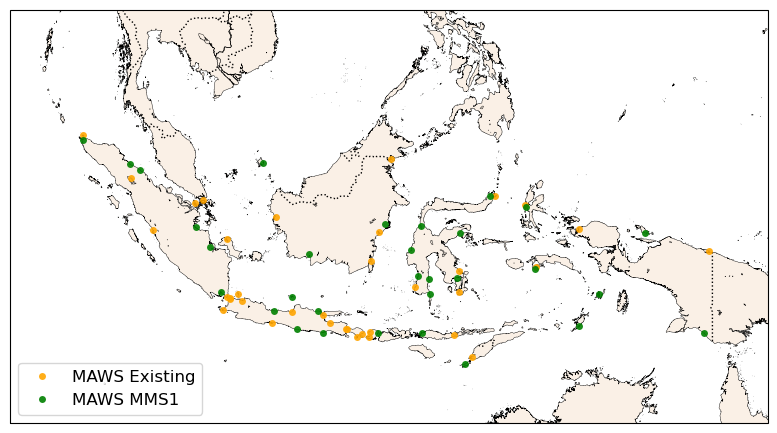

In [10]:
from diklatmar import plotter

maws = plotter(img_dir=imdir)
maws.plot_aws_location(awslocs1=locs1, awslocs2=locs2)
# maws.plot_aws_location()

#### !!! Pertanyaan 1 !!!

Coba buat plot berisi lokasi MAWS disekitar wilayah kerja anda

In [11]:
# Write your code here




### Catatan !!!

Beberapa data MAWS tidak tersedia secara lengkap untuk periode 2023–2024.

# Akses Data

Data observasi yang didapatkan dari MAWS disimpan dalam file dengan format `.parquet`. Format data ini dipilih karena efisiensi dalam penyimpanan dan pengambilan data. Selain itu, format ini menyediakan skema kompresi dan penyandian berkinerja tinggi untuk menangani data yang kompleks dalam jumlah besar dan didukung oleh banyak bahasa pemrograman dan alat analisis.

Untuk memuat atau membaca data, kita akan memerlukan pustaka python `pandas`. Pada bahasan berikut akan diberikan contoh mengakses data secara manual maupun dengan menggunakan modul yang telah disiapkan.

## Contoh akses data

### Akses data secara manual

#### Definisikan lokasi/path file

In [12]:
file_path = "/data/local/marine-training/data/MATPEL_03/MAWS_BMKG/1000000009-AWS_Maritim__Ujung_Kulon/Year=2024/Month=12/23.parquet"

'''
Pada pelatihan ini, file disusun berdasarkan tahun, bulan, dan tanggal. 
Berikut merupakan contoh untuk mengakses satu tanggal (23) pada tahun 2024 bulan 12 untuk AWS_Maritim__Ujung_Kulon
''';

#### Load data menggunakan pustaka Pandas

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
data_maws = pd.read_parquet(file_path)
# data_maws.index = pd.to_datetime(data_maws.index, format="%Y-%m-%d %H:%M:%S")
data_maws

,windspeed,winddir,temp,rh,pressure,rain,solrad,netrad,watertemp,waterlevel,ta_min,ta_max,pancilevel,pancitemp
time,,,,,,,,,,,,,,
2024-12-23 02:57:00,4.7,17.0,26.4,91.5,1010.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-12-23 02:58:00,4.7,17.0,26.5,92.1,1010.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-12-23 02:59:00,4.8,16.0,26.5,91.6,1010.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-12-23 03:00:00,5.2,15.0,26.6,91.7,1010.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-12-23 03:01:00,4.8,16.0,26.6,91.1,1010.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23 17:30:00,5.1,13.0,26.8,92.7,1009.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-12-23 17:31:00,4.4,11.0,26.8,92.6,1009.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-12-23 17:32:00,4.9,11.0,26.9,92.6,1009.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
isinstance(data_maws.index, pd.DatetimeIndex)

True

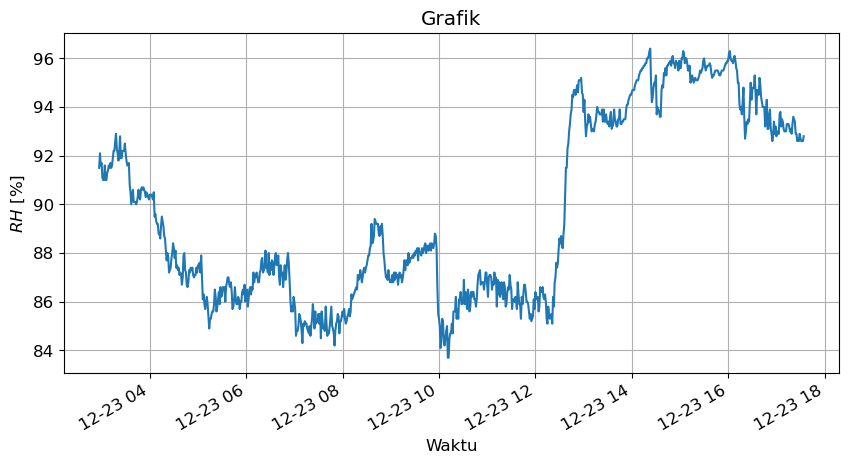

CPU times: user 8 µs, sys: 2 µs, total: 10 µs
Wall time: 17.6 µs


In [16]:
data_maws['rh'].plot(figsize=(10, 5))  # width=10, height=5 (dalam satuan inch)
plt.title("Grafik")
plt.xlabel("Waktu")
plt.ylabel(r"$RH \ [$%$]$")
plt.grid(True)
plt.show()
%time

#### !!! Pertanyaan 2 !!!

Mengakses dan membuat grafik sederhana untuk parameter suhu udara dan kelembapan nisbi

In [17]:
# Write your code here



#### Bagaimana memuat data selama satu bulan?

##### Membuat daftar path file yang terdapat pada satu direktori bulan tertentu

In [18]:
import os
path2dir = "/data/local/marine-training/data/MATPEL_03/MAWS_BMKG/1000000009-AWS_Maritim__Ujung_Kulon/Year=2024/Month=11"
fl_path_list = sorted([os.path.join(path2dir, f) for f in os.listdir(path2dir) if f.endswith('.parquet')])
fl_path_list

['/data/local/marine-training/data/MATPEL_03/MAWS_BMKG/1000000009-AWS_Maritim__Ujung_Kulon/Year=2024/Month=11/01.parquet',
 '/data/local/marine-training/data/MATPEL_03/MAWS_BMKG/1000000009-AWS_Maritim__Ujung_Kulon/Year=2024/Month=11/02.parquet',
 '/data/local/marine-training/data/MATPEL_03/MAWS_BMKG/1000000009-AWS_Maritim__Ujung_Kulon/Year=2024/Month=11/03.parquet',
 '/data/local/marine-training/data/MATPEL_03/MAWS_BMKG/1000000009-AWS_Maritim__Ujung_Kulon/Year=2024/Month=11/04.parquet',
 '/data/local/marine-training/data/MATPEL_03/MAWS_BMKG/1000000009-AWS_Maritim__Ujung_Kulon/Year=2024/Month=11/05.parquet',
 '/data/local/marine-training/data/MATPEL_03/MAWS_BMKG/1000000009-AWS_Maritim__Ujung_Kulon/Year=2024/Month=11/06.parquet',
 '/data/local/marine-training/data/MATPEL_03/MAWS_BMKG/1000000009-AWS_Maritim__Ujung_Kulon/Year=2024/Month=11/07.parquet',
 '/data/local/marine-training/data/MATPEL_03/MAWS_BMKG/1000000009-AWS_Maritim__Ujung_Kulon/Year=2024/Month=11/08.parquet',
 '/data/local/ma

##### Membaca dan memuat data

Membaca masing-masing file harian dalam bentuk dataframe kemudian menyimpannya ke dalam list, selanjutnya menggabungkannya menggunakan ```pd.concat()```

In [19]:
df_list = []
for fl in fl_path_list:
    df = pd.read_parquet(fl)
    df_list.append(df)
    
df_month = pd.concat(df_list)
df_month

,windspeed,winddir,temp,rh,pressure,rain,solrad,netrad,watertemp,waterlevel,ta_min,ta_max,pancilevel,pancitemp
time,,,,,,,,,,,,,,
2024-11-01 00:00:00,0.0,91.0,26.8,92.5,1010.4,0.0,0.0,0.0,0.0,1.195,0.0,0.0,0.0,0.0
2024-11-01 00:01:00,0.1,84.0,26.9,92.2,1010.4,0.0,0.0,0.0,0.0,1.196,0.0,0.0,0.0,0.0
2024-11-01 00:02:00,0.2,88.0,26.9,92.4,1010.4,0.0,0.0,0.0,0.0,1.186,0.0,0.0,0.0,0.0
2024-11-01 00:03:00,0.6,103.0,26.9,92.2,1010.4,0.0,0.0,0.0,0.0,1.199,0.0,0.0,0.0,0.0
2024-11-01 00:04:00,0.9,88.0,27.0,91.4,1010.4,0.0,0.0,0.0,0.0,1.201,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-30 23:55:00,0.4,113.0,25.8,98.8,1008.8,0.0,0.0,0.0,0.0,1.192,0.0,0.0,0.0,0.0
2024-11-30 23:56:00,0.5,113.0,25.8,98.8,1008.9,0.0,0.0,0.0,0.0,1.184,0.0,0.0,0.0,0.0
2024-11-30 23:57:00,0.5,110.0,25.8,98.8,1008.9,0.0,0.0,0.0,0.0,1.182,0.0,0.0,0.0,0.0


In [20]:
isinstance(df_month.index, pd.DatetimeIndex)

True

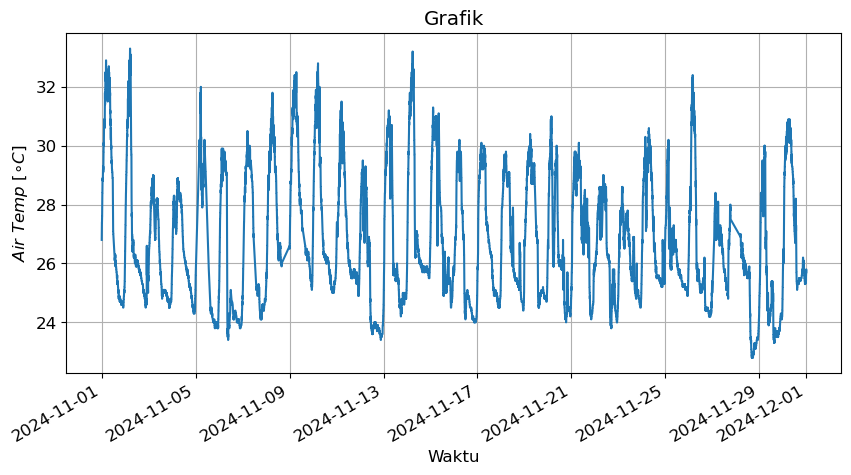

In [21]:
df_month['temp'].plot(figsize=(10, 5))  # width=10, height=5 (dalam satuan inch)
plt.title("Grafik")
plt.xlabel("Waktu")
plt.ylabel(r"$Air \ Temp \ [\circ C]$")
plt.grid(True)
plt.show()

#### Bagaimana menyeleksi data dari resolusi tiap menit menjadi data setiap 10 menit?

In [22]:
df_month_10min = df_month.resample('10min').first()
df_month_10min

,windspeed,winddir,temp,rh,pressure,rain,solrad,netrad,watertemp,waterlevel,ta_min,ta_max,pancilevel,pancitemp
time,,,,,,,,,,,,,,
2024-11-01 00:00:00,0.0,91.0,26.8,92.5,1010.4,0.0,0.0,0.0,0.0,1.195,0.0,0.0,0.0,0.0
2024-11-01 00:10:00,0.5,89.0,27.3,91.9,1010.4,0.0,0.0,0.0,0.0,1.209,0.0,0.0,0.0,0.0
2024-11-01 00:20:00,0.9,95.0,27.6,91.0,1010.6,0.0,0.0,0.0,0.0,1.208,0.0,0.0,0.0,0.0
2024-11-01 00:30:00,0.1,88.0,27.9,90.1,1010.8,0.0,0.0,0.0,0.0,1.196,0.0,0.0,0.0,0.0
2024-11-01 00:40:00,0.7,92.0,28.4,88.5,1010.8,0.0,0.0,0.0,0.0,1.193,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-30 23:10:00,0.3,89.0,25.4,98.5,1008.2,0.0,0.0,0.0,0.0,1.259,0.0,0.0,0.0,0.0
2024-11-30 23:20:00,0.1,123.0,25.4,98.6,1008.5,0.0,0.0,0.0,0.0,1.237,0.0,0.0,0.0,0.0
2024-11-30 23:30:00,0.0,112.0,25.5,98.7,1008.5,0.0,0.0,0.0,0.0,1.245,0.0,0.0,0.0,0.0


##### !!!!! PENTING !!!!!

Mohon membaca lebih lanjut mengenai resampling:
1. [Time Offset String][1]
2. [User guide][2]

[1]: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects
[2]: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling

#### !!! Pertanyaan 3 !!!

Mengakses dan membuat grafik sederhana untuk parameter suhu udara dan kelembapan nisbi untuk periode 1 bulan dengan resolusi temporal 1 jam

In [23]:
# Write your code here



### Akses data menggunakan modul yang telah disiapkan

Pada bagian [impor pustaka](#impor-modul) di awal notebook ini, kita telah mengimpor modul yang telah disiapkan:  ```diklatmar```. Pada modul tersebut terdapat submodul: ```plotter``` dan ```loader```. Submodul ```plotter``` digunakan untuk keperluan plotting sedangkan ```loader``` digunakan untuk keperluan mengakses dan memuat data. Berikut merupakan contoh untuk menggunakan submodul ```loader``` untuk mengakses data. Bedanya dengan mteode manual sebelumnya, memuat data menggunakan submodul ```loader``` akan langsung memuat data satu bulan.

#### Inisialisasi submodul dengan direktori data

In [24]:
data_load = loader(data_dir=dir_data)

#### Muat data AWS 

In [25]:
# Contoh ini menggunakan data MAWS Ujung Kulon
id_aws = 1000000009
tahun = 2024
bulan = 10

aws_data = data_load.maws_data(
    id_aws=id_aws,
    year=tahun,
    month=bulan
)

2025-05-05 03:06:23 :	I	Found AWS id: 1000000009
2025-05-05 03:06:23 :	I	Found year: 2024
2025-05-05 03:06:23 :	I	Found month: 10
2025-05-05 03:06:23 :	I	Loaded 10 files with 13535 records.


In [26]:
aws_data

,windspeed,winddir,temp,rh,pressure,rain,solrad,netrad,watertemp,waterlevel,ta_min,ta_max,pancilevel,pancitemp
time,,,,,,,,,,,,,,
2024-10-22 00:00:00,0.0,0.0,0.0,0.0,1012.3,0.0,0.0,0.0,0.0,2.160,0.0,0.0,0.0,0.0
2024-10-22 00:01:00,0.0,0.0,0.0,0.0,1012.3,0.0,0.0,0.0,0.0,2.153,0.0,0.0,0.0,0.0
2024-10-22 00:02:00,0.0,0.0,0.0,0.0,1012.3,0.0,0.0,0.0,0.0,2.159,0.0,0.0,0.0,0.0
2024-10-22 00:03:00,0.0,0.0,0.0,0.0,1012.3,0.0,0.0,0.0,0.0,2.159,0.0,0.0,0.0,0.0
2024-10-22 00:04:00,0.0,0.0,0.0,0.0,1012.4,0.0,0.0,0.0,0.0,2.164,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-31 23:55:00,0.3,101.0,26.8,92.1,1010.4,0.0,0.0,0.0,0.0,1.180,0.0,0.0,0.0,0.0
2024-10-31 23:56:00,0.0,92.0,26.9,92.1,1010.4,0.0,0.0,0.0,0.0,1.182,0.0,0.0,0.0,0.0
2024-10-31 23:57:00,0.1,89.0,26.8,92.2,1010.4,0.0,0.0,0.0,0.0,1.192,0.0,0.0,0.0,0.0


#### Muat dan simpan ke dalam file csv

In [27]:
# Contoh ini menggunakan data MAWS Ujung Kulon
id_aws = 1000000009
tahun = 2024
bulan = 10
dir_saving = '/home/dika/Diklat_Mar_2025/results/csv_files'

aws_data = data_load.maws_data(
    id_aws=id_aws,
    year=tahun,
    month=bulan,
    save_data=True,
    sv_dir=dir_saving
)

2025-05-05 03:06:23 :	I	Found AWS id: 1000000009
2025-05-05 03:06:23 :	I	Found year: 2024
2025-05-05 03:06:23 :	I	Found month: 10
2025-05-05 03:06:23 :	I	Loaded 10 files with 13535 records.
2025-05-05 03:06:24 :	I	Saving file to: /home/dika/Diklat_Mar_2025/results/csv_files/1000000009_2024_10.csv


#### !!! Pertanyaan 4 !!!

Mengakses data MAWS disekitar anda selama satu tahun. Buatlah serta membuat grafik sederhana

In [28]:
# Write your code here

